## Task 5: Crowd Dynamics

In [18]:
## Imports 

import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
from sw.pca import * 

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Fetch data 
df = pd.read_csv('datasets/MI_timesteps.txt',delim_whitespace=True)
data = np.array(df,dtype=float)
# remove burn-in period of 1000 time steps 
data = data[1000:, ]

### Part 1: Embedding according to Takens theorem 

In [20]:
delay = 351
M = np.empty((data.shape[0] - delay, delay*3))
for i in range(data.shape[0] - delay):
    M[i] = data[i: i+delay, 1:4].reshape(-1)

In [21]:
u,s,vh,sigma = pca(M, 3)

In [22]:
proj = (u @ sigma)

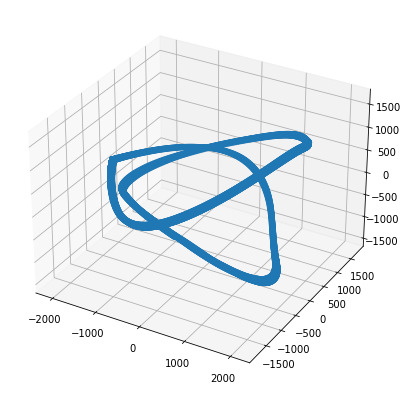

In [24]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")
ax.scatter(proj[:,0], proj[:,1], proj[:,2])
plt.savefig("figures/task_5/dynamics_pca")